# import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# get data

In [2]:
airline = pd.read_excel("C://Users//Swathi/Desktop//Excelr Classes//Assignments//15.Forecasting//Airlines+Data.xlsx")
airline.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [3]:
airline['Month'] = pd.to_datetime(airline['Month'])
airline['months'] = airline['Month'].dt.strftime('%b')
airline.tail()

,Month,Passengers,months
91,2002-08-01,405,Aug
92,2002-09-01,355,Sep
93,2002-10-01,306,Oct
94,2002-11-01,271,Nov
95,2002-12-01,306,Dec


# Analyse Data

In [4]:
print("Number of rows: ", len(airline))
print("Number of columns: ",len(airline.columns))
print("Number of rows and columns: ",airline.shape)
print("Number of elements: ",airline.size)
# print("Number of rows, columns, etc: ", airline.info())
# print ("Data type:\n",airline.dtypes)
# print ("Identify outliers & other info like Mean,median,max,min etc:\n\n",airline.describe())

Number of rows:  96
Number of columns:  3
Number of rows and columns:  (96, 3)
Number of elements:  288


# Visualiuze data

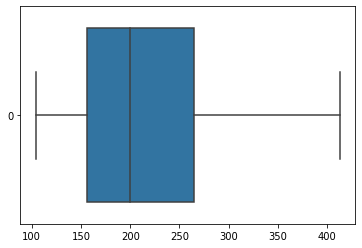

In [5]:
import seaborn as sns
sns.boxplot(data=airline['Passengers'],orient="h")

# define data pattern

In [6]:
months =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 

In [7]:
month_dummies = pd.DataFrame(pd.get_dummies(airline['months']))
airline1 = pd.concat([airline,month_dummies],axis = 1)
airline1.head()

,Month,Passengers,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,0,0,0,0,0,0,0,0,1,0,0,0


In [8]:
airline1["t"] = np.arange(1,97)   #time index
airline1["t_squared"] = airline1["t"]*airline1["t"] # for ploynomial/quadratic trend
airline1["log_Passengers"] = np.log(airline1["Passengers"]) # For multiplicative seasonality
airline1.columns

Index(['Month', 'Passengers', 'months', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan',
       'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 't', 't_squared',
       'log_Passengers'],
      dtype='object')

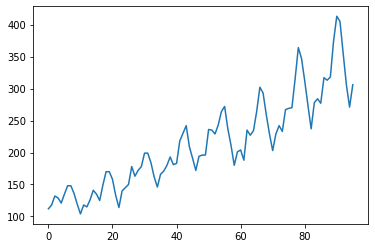

In [9]:
airline1.Passengers.plot()
plt.show()

In [10]:
Train = airline1.head(72)
Test = airline1.tail(24)

In [11]:
####################### L I N E A R ##########################
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
print("RMSE Linear: ",rmse_linear)

RMSE Linear:  51.66779299564628


In [12]:
##################### Exponential ##############################

Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
print("RMSE Exponential: ",rmse_Exp)

RMSE Exponential:  42.552328946004636


In [13]:
#################### Quadratic ###############################

Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
print("RMSE Quadratic: ",rmse_Quad)

RMSE Quadratic:  51.990736401553974


In [14]:
################### Additive seasonality ########################

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
print("RMSE Additive seasonality: ",rmse_add_sea)

RMSE Additive seasonality:  127.26451565320342


In [15]:
################## Additive Seasonality Quadratic ############################

add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
print("RMSE Additive Seasonality Quadratic:",rmse_add_sea_quad )

RMSE Additive Seasonality Quadratic: 35.24160848593803


In [16]:
################## Multiplicative Seasonality ##################

Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
print("RMSE Multiplicative Seasonality:",rmse_Mult_sea)

RMSE Multiplicative Seasonality: 132.18762800263443


In [17]:
##################Multiplicative Additive Seasonality ###########

Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
print("RMSE Multiplicative Additive Seasonality:",rmse_Mult_add_sea )

RMSE Multiplicative Additive Seasonality: 11.714670246780635


In [18]:
################## Testing #######################################

data1 = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data1)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,51.667793
1,rmse_Exp,42.552329
2,rmse_Quad,51.990736
3,rmse_add_sea,127.264516
4,rmse_add_sea_quad,35.241608
5,rmse_Mult_sea,132.187628
6,rmse_Mult_add_sea,11.714670


Observation:  rmse_Mult_add_sea has the least value among the models prepared so far 
              hence Multiplicative Additive Seasonality - best model

In [19]:
# Forecast for next 12 months

In [20]:
data = [['2003-01-01', 'Jan'], ['2003-02-01', 'Feb'], ['2003-03-01', 'Mar'],['2003-04-01', 'Apr'],['2003-5-01', 'May'],['2003-06-01', 'Jun'],
        ['2003-07-01', 'Jul'],['2003-08-01', 'Aug'],['2003-09-01', 'Sep'],['2003-10-01', 'Oct'],['2003-11-01', 'Nov'],['2003-12-01', 'Dec']]
# print(data)
forecast = pd.DataFrame(data, columns = ['Date', 'Months'])
forecast

,Date,Months
0,2003-01-01,Jan
1,2003-02-01,Feb
2,2003-03-01,Mar
3,2003-04-01,Apr
4,2003-5-01,May
5,2003-06-01,Jun
6,2003-07-01,Jul
7,2003-08-01,Aug
8,2003-09-01,Sep
9,2003-10-01,Oct


In [21]:
# Create dummies and T and T-Square columns

dummies = pd.DataFrame(pd.get_dummies(forecast['Months']))
forecast1 = pd.concat([forecast,dummies],axis = 1)
print("After dummy\n",forecast1.head())

forecast1["t"] = np.arange(1,13)   
forecast1["t_squared"] = forecast1["t"]*forecast1["t"] 
print("\nAfter T and T-Square\n",forecast1.head())

After dummy
          Date Months  Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  \
0  2003-01-01    Jan    0    0    0    0    1    0    0    0    0    0    0   
1  2003-02-01    Feb    0    0    0    1    0    0    0    0    0    0    0   
2  2003-03-01    Mar    0    0    0    0    0    0    0    1    0    0    0   
3  2003-04-01    Apr    1    0    0    0    0    0    0    0    0    0    0   
4   2003-5-01    May    0    0    0    0    0    0    0    0    1    0    0   

   Sep  
0    0  
1    0  
2    0  
3    0  
4    0  

After T and T-Square
          Date Months  Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  \
0  2003-01-01    Jan    0    0    0    0    1    0    0    0    0    0    0   
1  2003-02-01    Feb    0    0    0    1    0    0    0    0    0    0    0   
2  2003-03-01    Mar    0    0    0    0    0    0    0    1    0    0    0   
3  2003-04-01    Apr    1    0    0    0    0    0    0    0    0    0    0   
4   2003-5-01    May    0    0    0    0

In [22]:
# Forecasting using Multiplicative Additive Seasonality Model

model_full = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data =airline1).fit()
pred_new  = pd.Series(model_full.predict(forecast1))
pred_new

forecast1["Forecasted_log"] = pd.Series(pred_new)
forecast1['Forecasted_Passengers'] = np.exp(forecast1['Forecasted_log'])

In [23]:
# Final sales Prediction

Final_predict = forecast1.loc[:, ['Months', 'Forecasted_Passengers']] 
Final_predict

,Months,Forecasted_Passengers
0,Jan,109.176148
1,Feb,110.331245
2,Mar,127.315234
3,Apr,123.200587
4,May,122.399578
5,Jun,138.536397
6,Jul,154.066959
7,Aug,153.741209
8,Sep,137.693733
9,Oct,120.894736
